In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

df=pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [98]:
df.shape

(569, 33)

In [99]:
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')


In [100]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [102]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [103]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [104]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [105]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [106]:
nums_col=df.select_dtypes(include=['float64','int64']).columns
print("Before skew")
print(df[nums_col].skew())

Before skew
diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst 

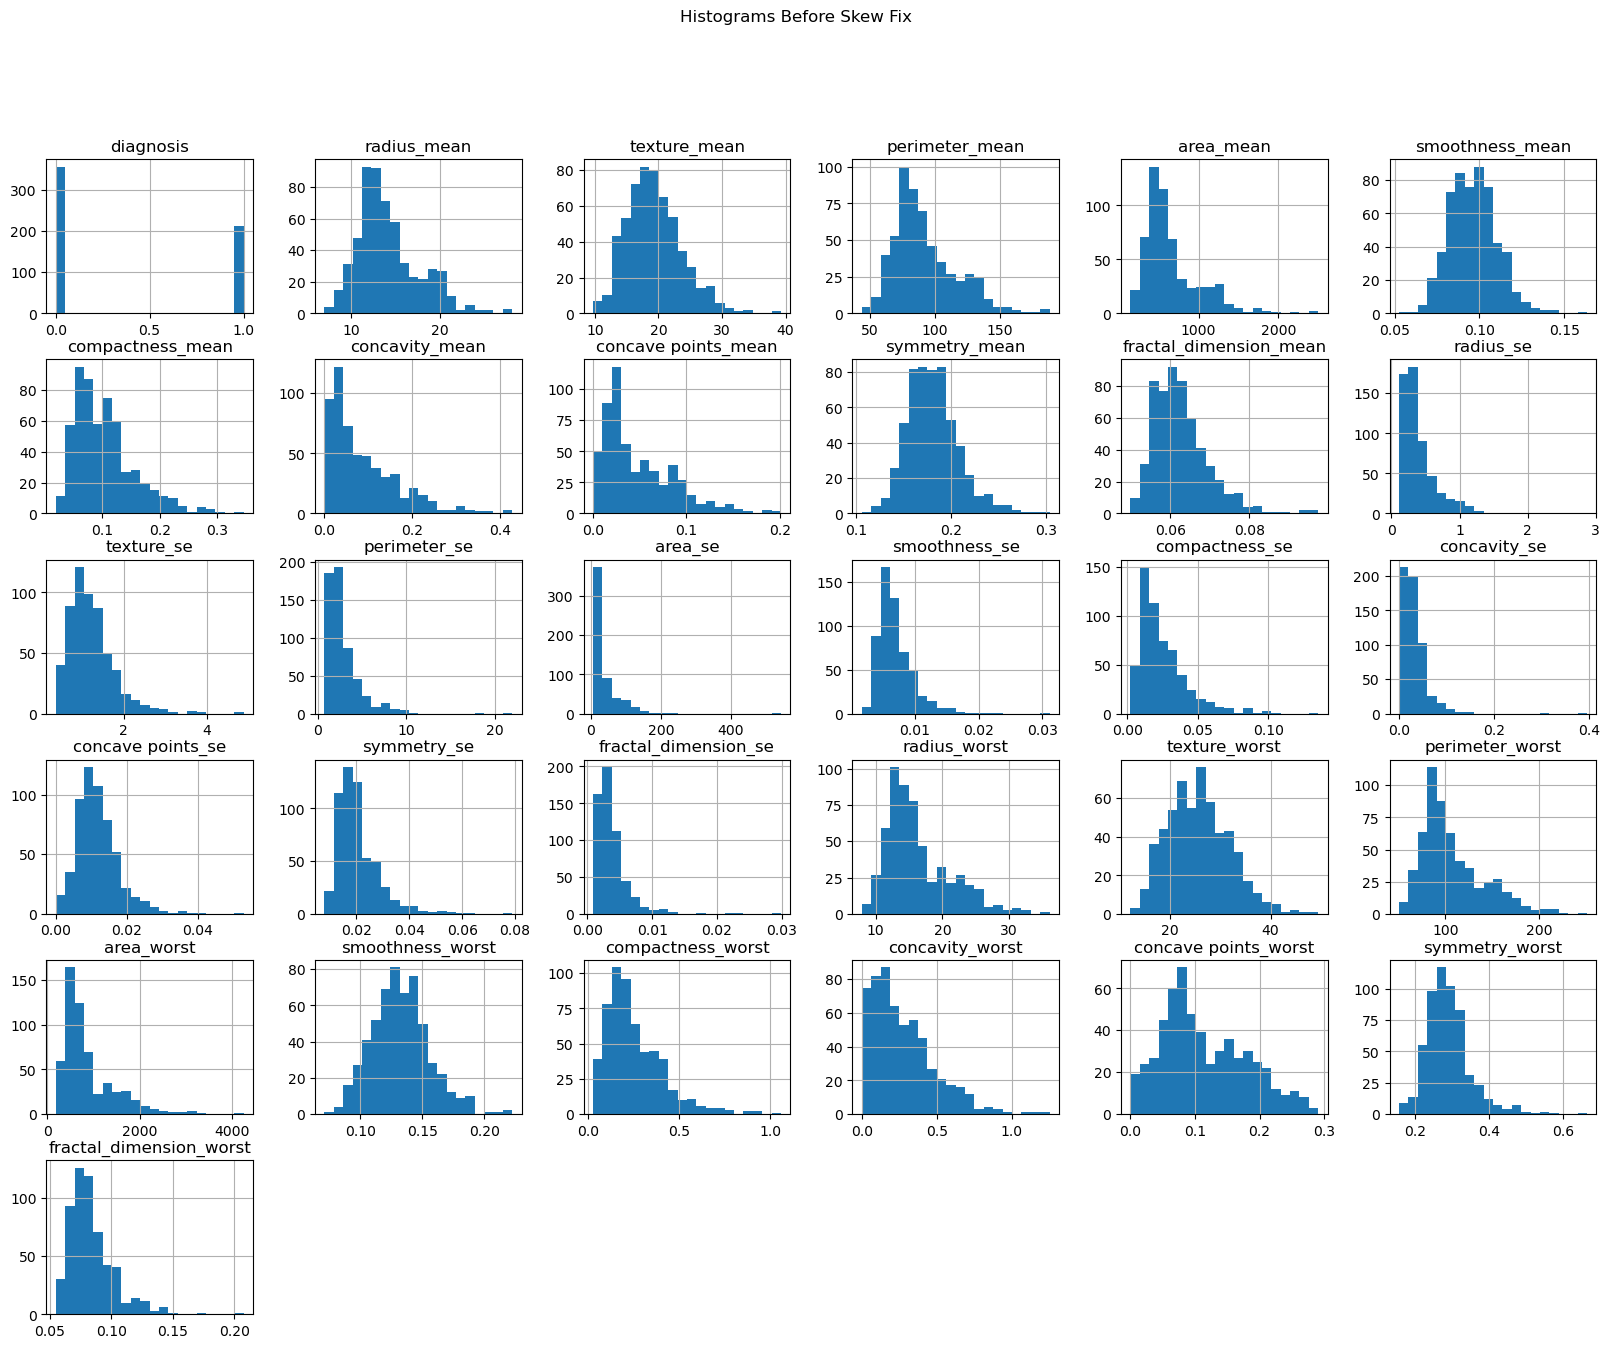

In [107]:
df[nums_col].hist(figsize=(20,15), bins=20)
plt.suptitle('Histograms Before Skew Fix')
plt.show()

In [108]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[nums_col] = pt.fit_transform(df[nums_col])
print("After fix skew:")
print(df[nums_col].skew())

After fix skew:
diagnosis                  0.528461
radius_mean                0.008176
texture_mean               0.000172
perimeter_mean             0.007262
area_mean                  0.005204
smoothness_mean           -0.009630
compactness_mean           0.105564
concavity_mean             0.223924
concave points_mean        0.198740
symmetry_mean             -0.016675
fractal_dimension_mean     0.036216
radius_se                  0.194796
texture_se                 0.013032
perimeter_se               0.080793
area_se                    0.069306
smoothness_se              0.084004
compactness_se             0.204970
concavity_se               0.145901
concave points_se         -0.037805
symmetry_se                0.135894
fractal_dimension_se       0.234550
radius_worst               0.033651
texture_worst             -0.004161
perimeter_worst            0.031123
area_worst                 0.026797
smoothness_worst          -0.001329
compactness_worst          0.091660
concavity_wo

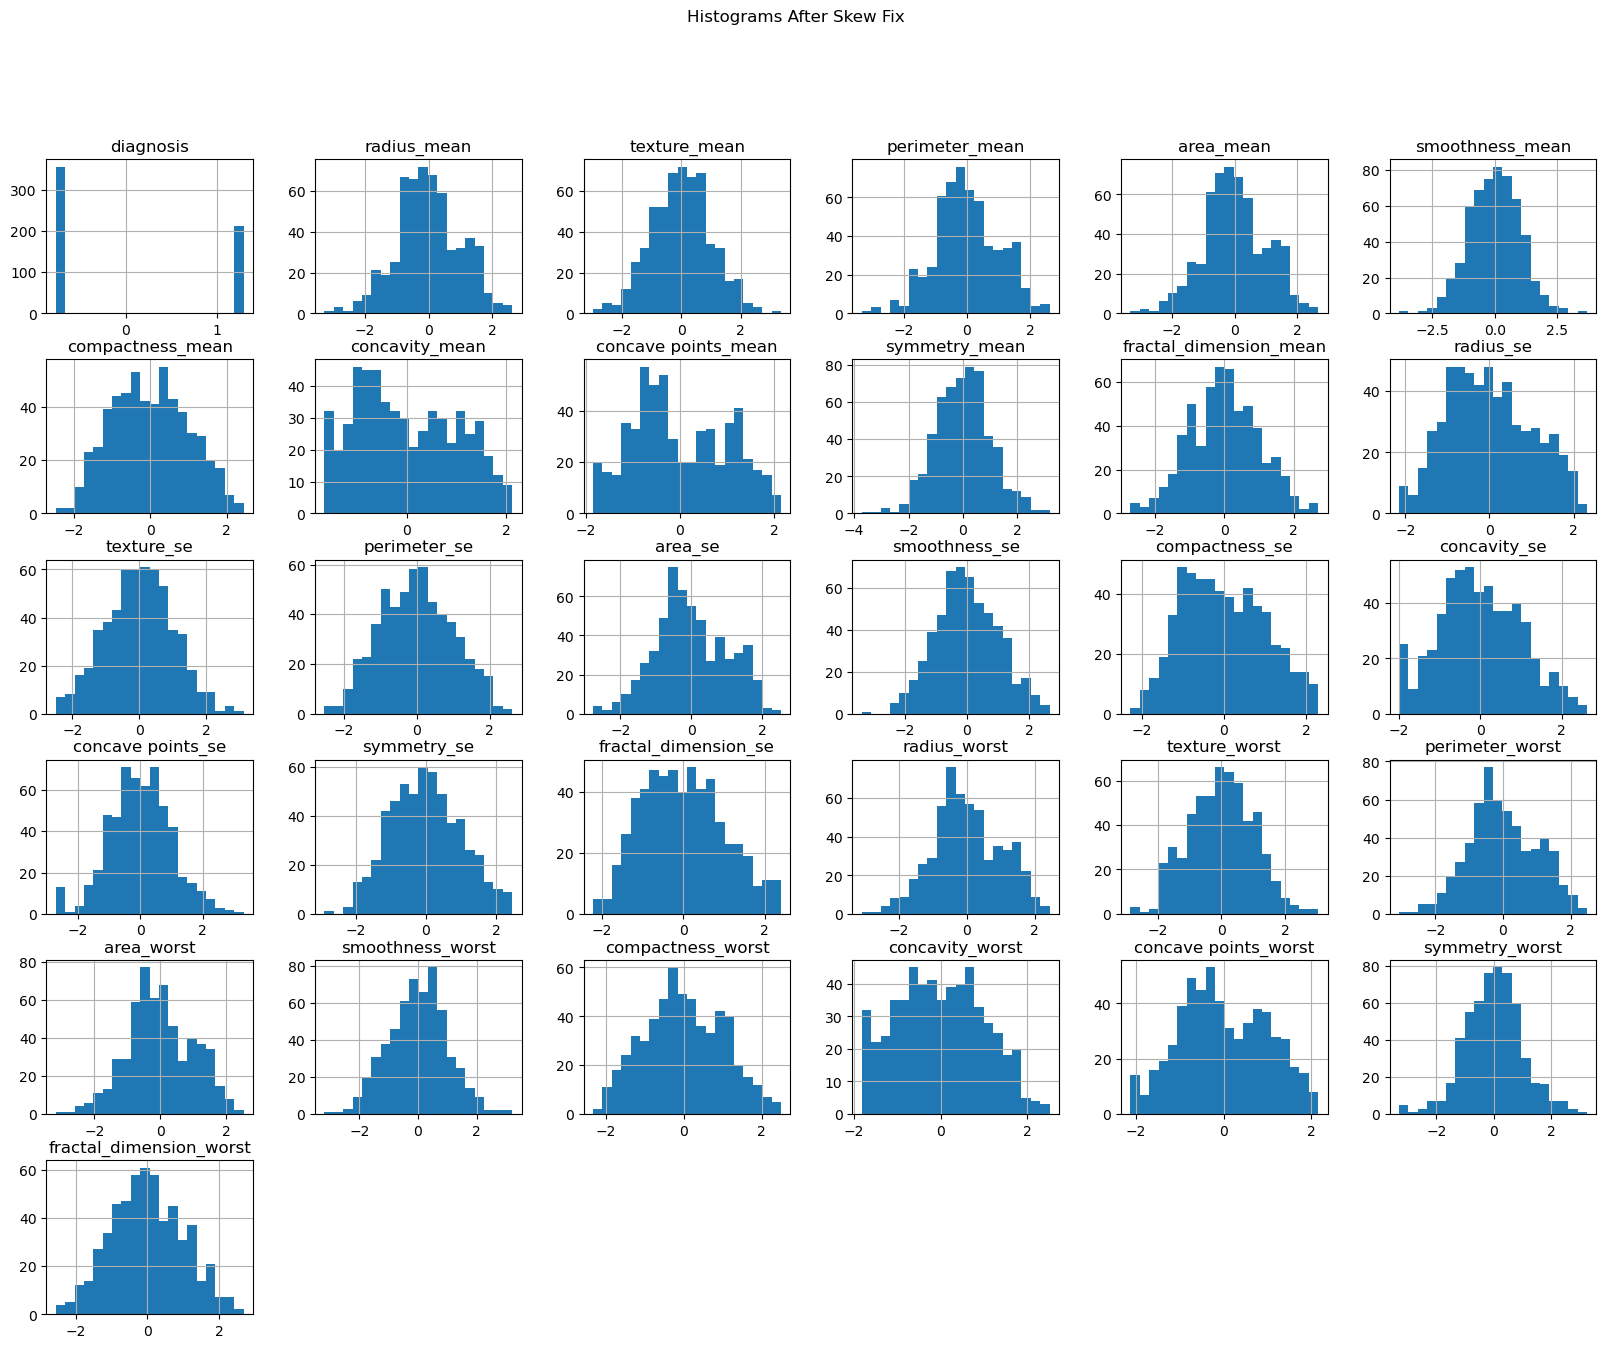

In [109]:
df[nums_col].hist(figsize=(20,15), bins=20)
plt.suptitle('Histograms After Skew Fix')
plt.show()

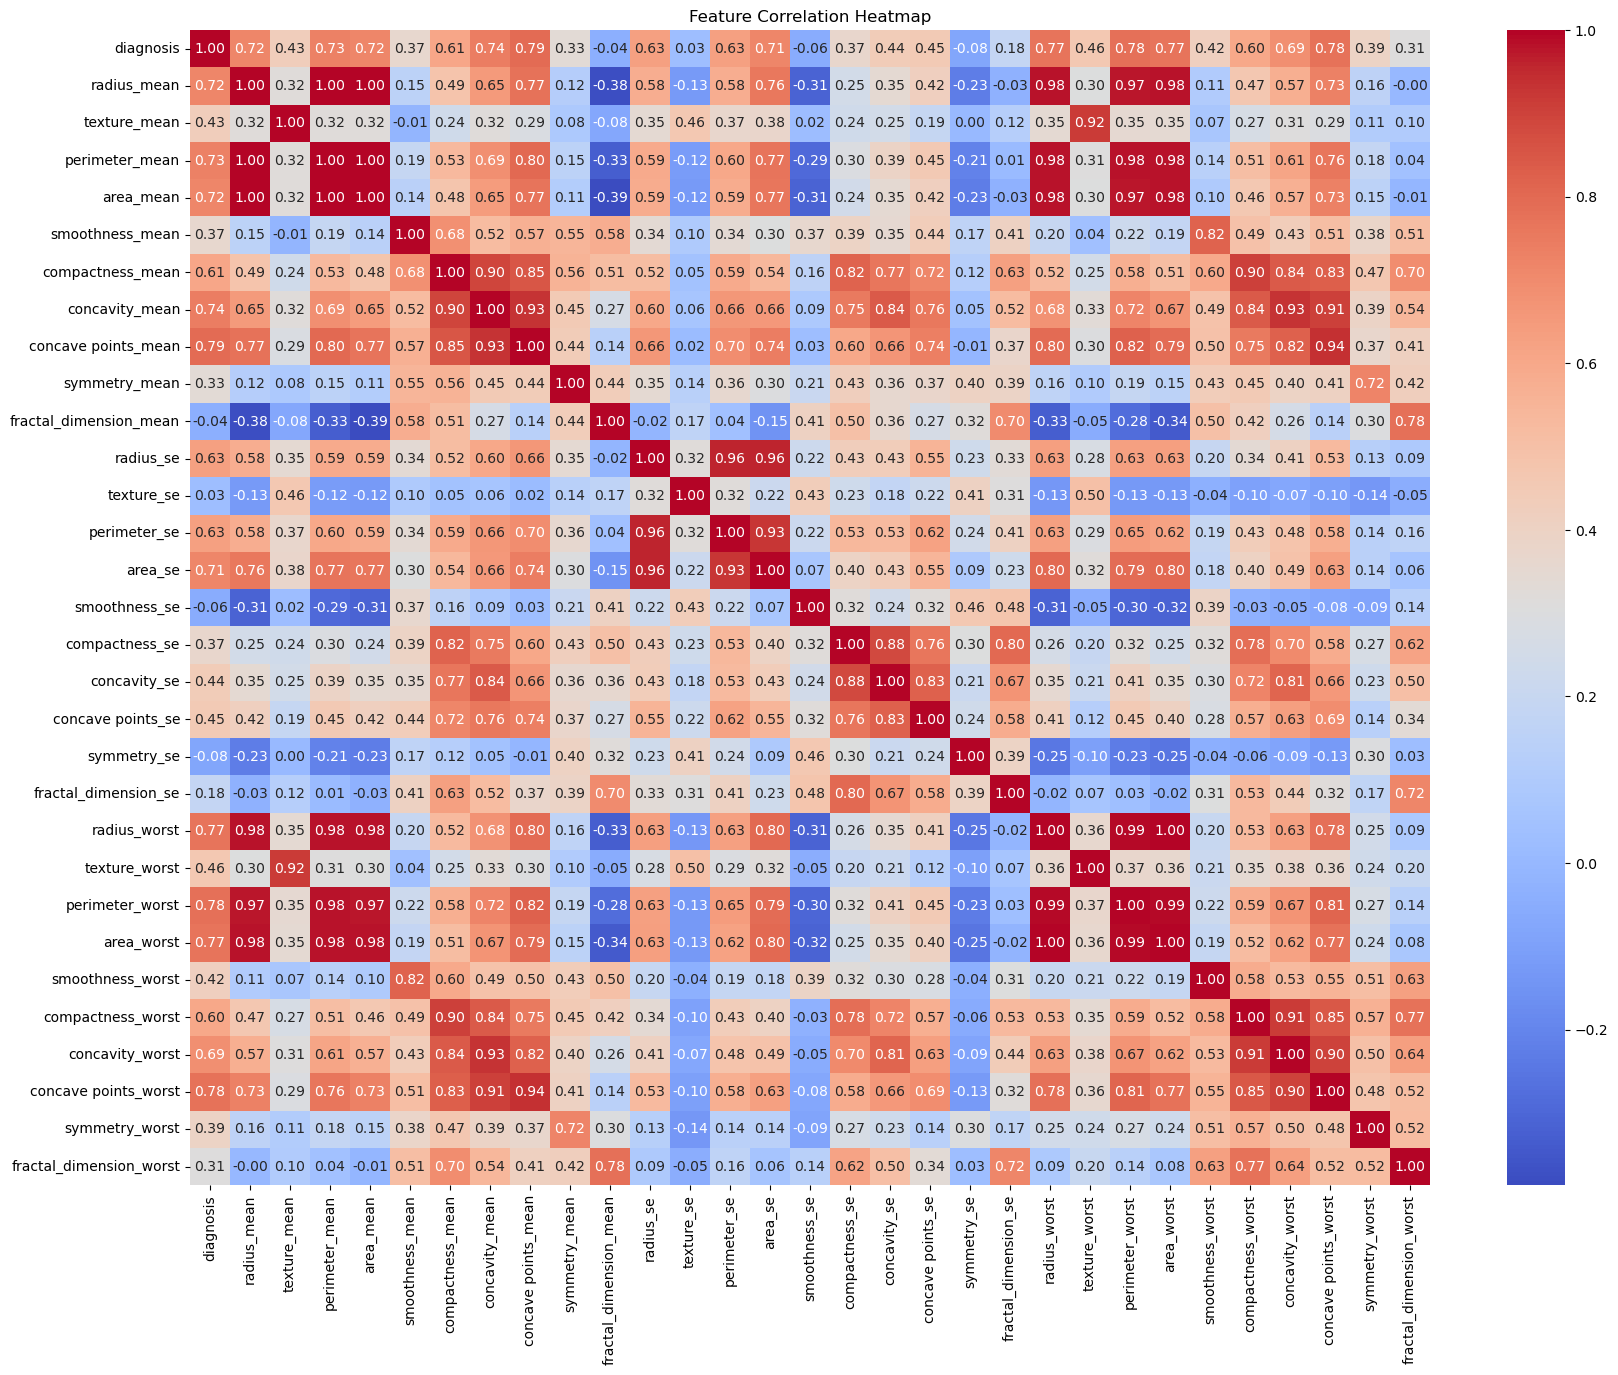

In [110]:
corr_matrix=df[nums_col].corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [111]:

def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_counts[col] = len(outliers)
    return outlier_counts

outlier_counts = count_outliers(df)
print("Before Outliers")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Before Outliers
diagnosis: 0
radius_mean: 6
texture_mean: 2
perimeter_mean: 4
area_mean: 6
smoothness_mean: 5
compactness_mean: 0
concavity_mean: 0
concave points_mean: 0
symmetry_mean: 8
fractal_dimension_mean: 0
radius_se: 0
texture_se: 1
perimeter_se: 0
area_se: 1
smoothness_se: 1
compactness_se: 0
concavity_se: 0
concave points_se: 17
symmetry_se: 1
fractal_dimension_se: 0
radius_worst: 1
texture_worst: 1
perimeter_worst: 1
area_worst: 1
smoothness_worst: 4
compactness_worst: 0
concavity_worst: 0
concave points_worst: 0
symmetry_worst: 13
fractal_dimension_worst: 0


In [112]:
def remove_outliers(df):
    df_cleaned = df.copy()
    cols_to_check = [col for col in df_cleaned.columns if col != 'diagnosis']
    for col in cols_to_check:
        if df_cleaned[col].dtype in ['int64', 'float64']:
            Q1 = df_cleaned[col].quantile(0.25)
            Q3 = df_cleaned[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    return df_cleaned

df_cleaned = remove_outliers(df)
outlier_counts_after = count_outliers(df_cleaned)

print("outliers after removal:")
for col, count in outlier_counts_after.items():
    print(f"{col}: {count}")

outliers after removal:
diagnosis: 0
radius_mean: 1
texture_mean: 1
perimeter_mean: 0
area_mean: 0
smoothness_mean: 1
compactness_mean: 0
concavity_mean: 0
concave points_mean: 0
symmetry_mean: 0
fractal_dimension_mean: 0
radius_se: 0
texture_se: 0
perimeter_se: 0
area_se: 0
smoothness_se: 0
compactness_se: 0
concavity_se: 0
concave points_se: 0
symmetry_se: 0
fractal_dimension_se: 0
radius_worst: 0
texture_worst: 1
perimeter_worst: 0
area_worst: 0
smoothness_worst: 0
compactness_worst: 0
concavity_worst: 0
concave points_worst: 0
symmetry_worst: 0
fractal_dimension_worst: 0


In [113]:
print("After clean")
print(df_clean.shape)

After clean
(520, 31)


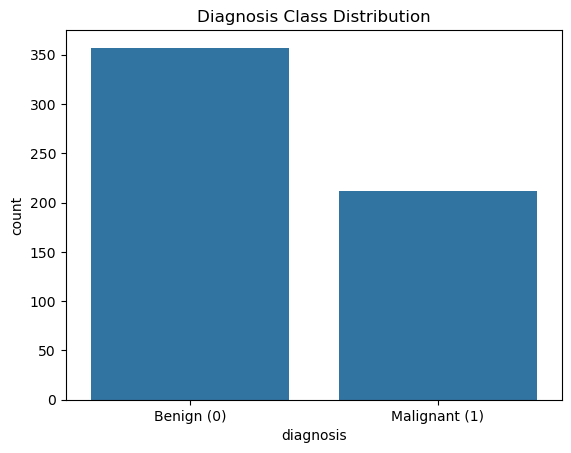

In [114]:
sns.countplot(x=df['diagnosis'])
plt.title('Diagnosis Class Distribution')
plt.xlabel('diagnosis')
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.show()

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("\nClass distribution in training data:")
print(pd.Series(y_train).value_counts())
print("\nClass distribution in test data:")
print(pd.Series(y_test).value_counts())



Class distribution in training data:
0    261
1    155
Name: count, dtype: int64

Class distribution in test data:
0    65
1    39
Name: count, dtype: int64


In [116]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)

Scaled training data shape: (416, 30)
Scaled test data shape: (104, 30)


In [117]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2, epochs=50, batch_size=32, verbose=1
)



loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)

y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print(f'Test Accuracy: {accuracy:.4f}')



Epoch 1/50


c:\Users\ruthr\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8163 - loss: 0.4811 - val_accuracy: 0.9048 - val_loss: 0.4063
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8916 - loss: 0.3597 - val_accuracy: 0.9048 - val_loss: 0.3086
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9277 - loss: 0.2819 - val_accuracy: 0.9048 - val_loss: 0.2523
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9428 - loss: 0.2216 - val_accuracy: 0.9167 - val_loss: 0.2165
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9518 - loss: 0.2036 - val_accuracy: 0.9167 - val_loss: 0.1909
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9578 - loss: 0.1797 - val_accuracy: 0.9405 - val_loss: 0.1713
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9398 - loss: 0.1605 - val_accuracy: 0.9524 - val_loss: 0.1590
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9639 - loss: 0.1385 - val_accuracy: 0.9524 - val_loss: 0.

In [118]:
import pickle
from tensorflow import keras

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
with open('power_transformer.pkl', 'wb') as f:
    pickle.dump(pt, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

model.save('my_model.keras')
